In [59]:
%matplotlib inline
import matplotlib.pyplot as plt #For plot
import pandas as pd #For DataFrame
import numpy as np #For scientific computing

In [60]:
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [61]:
batch_size = 256
num_classes = 26
epochs = 10

In [62]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/ShellLearn/emnist/"

In [63]:
mapping_file = Emnist_file_path + 'emnist-letters-mapping.txt'

In [64]:
with open(mapping_file, 'r') as fin: 
    mapping = fin.readlines() 

In [65]:
ascii_map = {} 
for line in mapping: 
    char_class = int(line.split()[0]) 
    letter = chr(int(line.split()[1])) 
    ascii_map[char_class] = letter

In [66]:
All_train = Emnist_file_path + 'emnist-letters-train.csv'
All_test = Emnist_file_path + 'emnist-letters-test.csv'

In [67]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [68]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [69]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(88799, 785)
(14799, 785)


In [70]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (88799, 784)
y_train shape :  (88799, 1)


In [71]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (14799, 784)
y_test shape :  (14799, 1)


In [72]:
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

In [73]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (88799, 784)


In [74]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (14799, 784)


data  9658  :  [13]


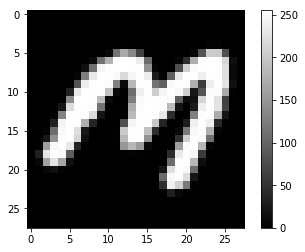

In [75]:
# Print the i data 

i = 9658
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [76]:
# Scale from 0 to 255

x_train /= 255
x_test /= 255

In [77]:
# Make it 0 based indices

y_train = y_train - 1
y_test = y_test - 1

In [78]:
# Encode Categorical Integer Labels Using a One-Hot Scheme.# One-hot encode the labels

y_train = keras.utils.to_categorical(y_train, num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)

In [79]:
# Define the Model Architecture # Define the model

model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [80]:
# summarize the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                13338     
Total para

In [81]:
# Compile the Model

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                13338     
Total para

In [83]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 0.2635%


In [84]:
# Train the model

checkpointer = ModelCheckpoint(filepath='emnist.letters.dense.model.best.hdf5', verbose=1, save_best_only=True)

In [85]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=3, shuffle=True)

Train on 71039 samples, validate on 17760 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.67363, saving model to emnist.letters.dense.model.best.hdf5
Epoch 2/10

Epoch 00002: val_loss improved from 0.67363 to 0.49499, saving model to emnist.letters.dense.model.best.hdf5
Epoch 3/10

Epoch 00003: val_loss improved from 0.49499 to 0.42479, saving model to emnist.letters.dense.model.best.hdf5
Epoch 4/10

Epoch 00004: val_loss improved from 0.42479 to 0.39927, saving model to emnist.letters.dense.model.best.hdf5
Epoch 5/10

Epoch 00005: val_loss improved from 0.39927 to 0.37847, saving model to emnist.letters.dense.model.best.hdf5
Epoch 6/10

Epoch 00006: val_loss improved from 0.37847 to 0.35125, saving model to emnist.letters.dense.model.best.hdf5
Epoch 7/10

Epoch 00007: val_loss improved from 0.35125 to 0.34002, saving model to emnist.letters.dense.model.best.hdf5
Epoch 8/10

Epoch 00008: val_loss improved from 0.34002 to 0.32779, saving model to emnist.letters.dense.mo

In [86]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.letters.dense.model.best.hdf5')

In [87]:
# Save the best model

model.save('eminst_letters_dense_model.h5')

In [88]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

In [89]:
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 88.5330%
Test loss: 34.5194%


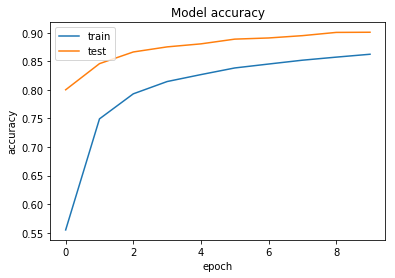

In [90]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

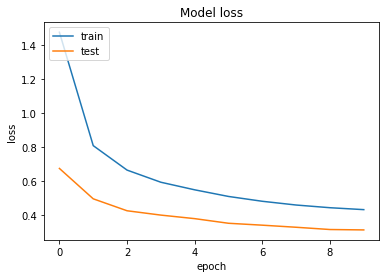

In [91]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [92]:
test = np.expand_dims(x_train[3], axis=0)
test.shape

(1, 784)

data  9658  :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


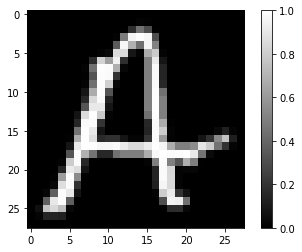

In [93]:
# Print the i data 
plt.imshow(x_test[3].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[3])

In [94]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Predicted class: [13]


In [115]:
filepath = "uploads/LetterA2.png"

In [116]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [117]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [118]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

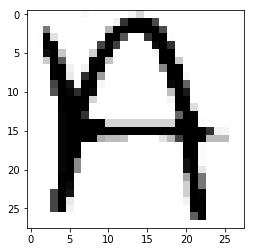

In [119]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

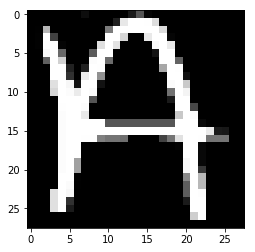

In [120]:
# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [121]:
# Make predictions
pred = model.predict_classes(img)

In [122]:
pred[0]+1

17

In [123]:
pred_letter = ascii_map[pred[0]+1] 
pred_letter

'Q'